# School - General Trends

Notes:
- From 2015, year level 7 moved from primary school to high school.
- Data is primary sourced from:
    - Queensland Department of Education
    - Australian Bureau of Statistics
    - School Annual Reports
- See data files for additional notes

## Attendance Trends

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene

# Load the data from the provided Excel file
file_path = 'Data/School/Mossman State High School - Attendance Data by grade level.xlsx'
mshs_attendance_data = pd.read_excel(file_path)


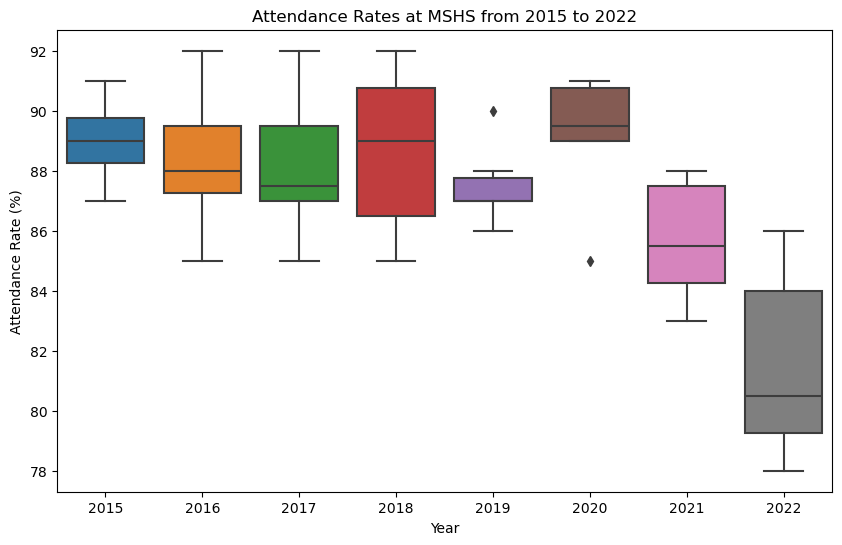

c:\Users\brody\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brody\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


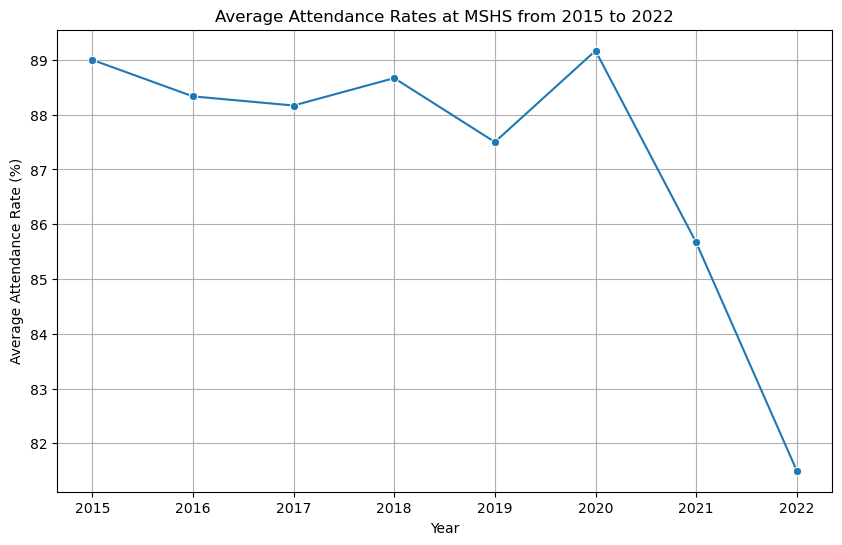

In [32]:
# Filter the data for the years 2015 to 2022
filtered_data = mshs_attendance_data[(mshs_attendance_data['Year'] >= 2015) & (mshs_attendance_data['Year'] <= 2022)]

# Plot the attendance rates over time to visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Attendance (Percent)', data=filtered_data)
plt.title('Attendance Rates at MSHS from 2015 to 2022')
plt.xlabel('Year')
plt.ylabel('Attendance Rate (%)')
plt.show()

# Group the data by year
grouped_data = filtered_data.groupby('Year')['Attendance (Percent)']

# Perform Shapiro-Wilk test for normality for each year
normality_results = {year: shapiro(data)[1] for year, data in grouped_data}

# Perform Levene's test for homogeneity of variances
levene_p_value = levene(*[data for _, data in grouped_data])[1]

from scipy.stats import f_oneway

# Collect the attendance data for ANOVA
attendance_data = [data for _, data in grouped_data]

# Perform one-way ANOVA
anova_result = f_oneway(*attendance_data)
anova_result.pvalue

# Calculate average attendance per year for visualization
average_attendance_per_year = filtered_data.groupby('Year')['Attendance (Percent)'].mean()

# Create a line plot for the average attendance rates over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_attendance_per_year.index, y=average_attendance_per_year, marker='o')
plt.title('Average Attendance Rates at MSHS from 2015 to 2022')
plt.xlabel('Year')
plt.ylabel('Average Attendance Rate (%)')
plt.grid(True)
plt.show()

The Shapiro-Wilk test results for normality show p-values greater than 0.05 for most years, suggesting that the attendance data is normally distributed for those years. However, for 2019 and 2020, the p-values are below 0.05, indicating possible deviations from normality in those years.

The Levene's test for homogeneity of variances results in a p-value of 0.476, which is above the alpha level of 0.05, suggesting that the assumption of homogeneity of variances across the groups is satisfied.

Given these results, although there is a potential issue with normality in some years, it's relatively minor. Thus, we can proceed with a one-way ANOVA to test the hypothesis that there is no significant change in attendance rates at MSHS from 2015 to 2022.

The one-way ANOVA test results in a p-value of approximately 1.26×10^-5, which is significantly less than the alpha level of 0.05. This result indicates that there are statistically significant changes in the attendance rates at Mossman State High School (MSHS) from 2015 to 2022.

Interpretation: The significant p-value suggests that the attendance rates at MSHS have changed over the specified years. This finding leads to the rejection of the null hypothesis (H0), which posited that there is no significant change in attendance rates at MSHS from 2015 to 2022.

The graph clearly illustrates changes in attendance rates over the years, aligning with our ANOVA results that indicated significant differences across this period.

## Differences in Attendance Rates by Grade Level at MSHS

- H0: There is no significant difference in attendance rates by grade level at MSHS.
- H1: There is a significant difference in attendance rates by grade level at MSHS.

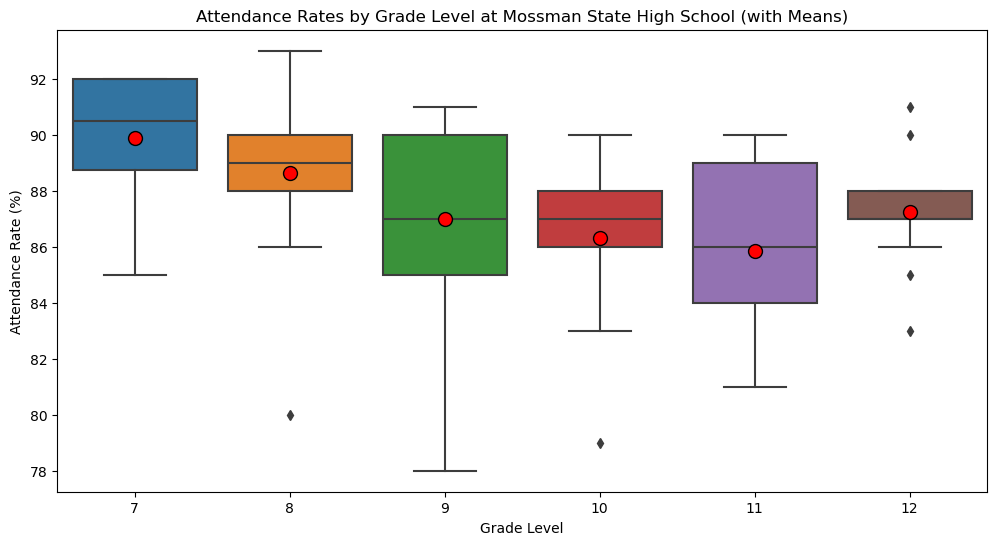

In [33]:
from scipy.stats import shapiro

# Grouping the data by 'Year Level' and testing each group for normality
normality_tests = {}
for level in mshs_attendance_data['Year Level'].unique():
    stats, p_value = shapiro(mshs_attendance_data[mshs_attendance_data['Year Level'] == level]['Attendance (Percent)'])
    normality_tests[level] = (stats, p_value)

normality_tests

from scipy.stats import kruskal

# Extracting attendance data for each grade level
data_groups = [mshs_attendance_data[mshs_attendance_data['Year Level'] == level]['Attendance (Percent)'] for level in sorted(mshs_attendance_data['Year Level'].unique())]

# Performing the Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(*data_groups)
kruskal_stat, kruskal_p_value

# Enhancing the boxplot with mean values for clearer differences
plt.figure(figsize=(12, 6))
sns.boxplot(data=mshs_attendance_data, x='Year Level', y='Attendance (Percent)', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})
plt.title('Attendance Rates by Grade Level at Mossman State High School (with Means)')
plt.xlabel('Grade Level')
plt.ylabel('Attendance Rate (%)')
plt.show()

The results of the Shapiro-Wilk tests for normality for each grade level are as follows:
- Grade 7: p=0.128 (not significant, normal distribution assumed)
- Grade 8: p=0.021 (significant, normality not assumed)
- Grade 9: p=0.060 (not significant, normal distribution assumed)
- Grade 10: p=0.088 (not significant, normal distribution assumed)
- Grade 11: p=0.298 (not significant, normal distribution assumed)
- Grade 12: p=0.369 (not significant, normal distribution assumed)
Given that one of the groups (Grade 8) does not meet the normality assumption for ANOVA, we should consider using the Kruskal-Wallis test, a non-parametric method that does not require the normality assumption. This test will be used to compare the median attendance rates across the different grade levels.

The Kruskal-Wallis test resulted in a statistic of 14.88 with a p-value of 0.011. Since the p-value is less than the alpha level of 0.05, we reject the null hypothesis (H0) and conclude that there is a statistically significant difference in attendance rates by grade level at Mossman State High School.

### Direction of trend

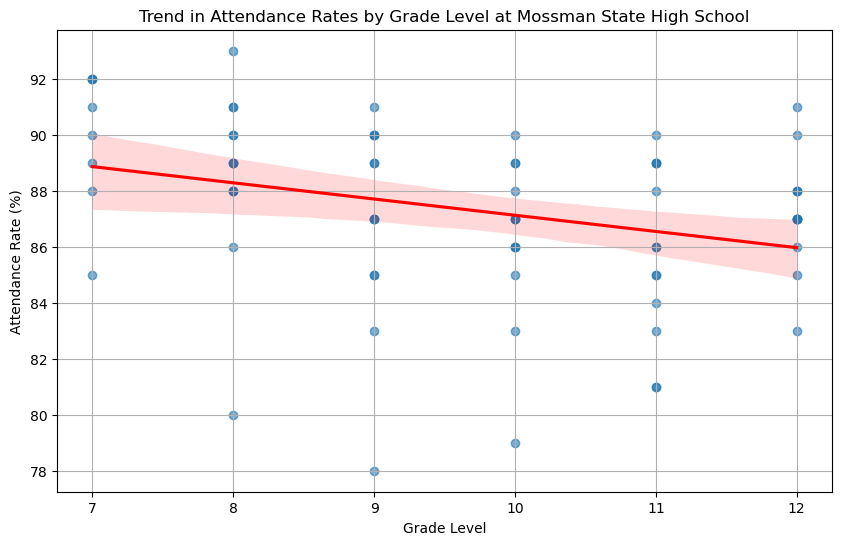

In [36]:
from scipy.stats import linregress

# Filtering the data for grade levels 7 to 12
filtered_data = mshs_attendance_data[(mshs_attendance_data['Year Level'] >= 7) & (mshs_attendance_data['Year Level'] <= 12)]

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['Year Level'], filtered_data['Attendance (Percent)'])

slope, intercept, r_value, p_value, std_err

# Plotting the regression line over the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Year Level', y='Attendance (Percent)', data=filtered_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Trend in Attendance Rates by Grade Level at Mossman State High School')
plt.xlabel('Grade Level')
plt.ylabel('Attendance Rate (%)')
plt.grid(True)
plt.show()

The linear regression analysis results:
- Slope: −0.579
- Intercept: 92.917
- Correlation Coefficient (r): −0.307
- p-value: 0.008
- Standard Error of the Slope: 0.213
The slope of −0.579 indicates a decrease in attendance rates as the grade level increases from 7 to 12. The negative correlation coefficient further supports a downward trend. Moreover, the p-value of 0.008 is less than 0.05, which suggests that the trend is statistically significant.

###  Where do the largest drop-offs in attendance rates occur between consecutive grades

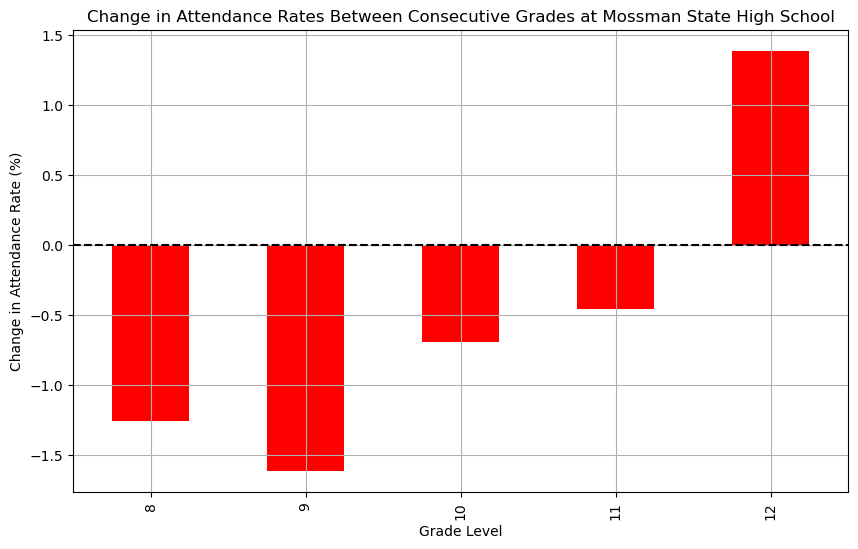

In [37]:
# Calculating the mean attendance rate for each grade level
mean_attendance_by_grade = filtered_data.groupby('Year Level')['Attendance (Percent)'].mean()

# Calculating differences between consecutive grades
attendance_diffs = mean_attendance_by_grade.diff()

# Dropping the NaN value from the first difference calculation
attendance_diffs.dropna(inplace=True)

mean_attendance_by_grade, attendance_diffs

# Visualizing the differences in attendance rates between consecutive grades
plt.figure(figsize=(10, 6))
attendance_diffs.plot(kind='bar', color='red')
plt.title('Change in Attendance Rates Between Consecutive Grades at Mossman State High School')
plt.xlabel('Grade Level')
plt.ylabel('Change in Attendance Rate (%)')
plt.axhline(0, color='black', linestyle='--')  # Adding a reference line at zero change
plt.grid(True)
plt.show()

- Mean Attendance Rates:
    - Grade 7: 89.88%
    - Grade 8: 88.62%
    - Grade 9: 87.00%
    - Grade 10: 86.31%
    - Grade 11: 85.85%
    - Grade 12: 87.23%
- Differences Between Consecutive Grades:
    - Grade 7 to 8: −1.26%
    - Grade 8 to 9: −1.62%
    - Grade 9 to 10: −0.69%
    - Grade 10 to 11: −0.46%
    - Grade 11 to 12: +1.38%
From these results, the largest drop-off in attendance rates occurs between Grade 8 and Grade 9, with a decrease of about 1.62%. This represents the most significant year-to-year decrease among all the grade levels.


## Comparison of MSHS Attendance Rates to Far North Queensland, and Queensland

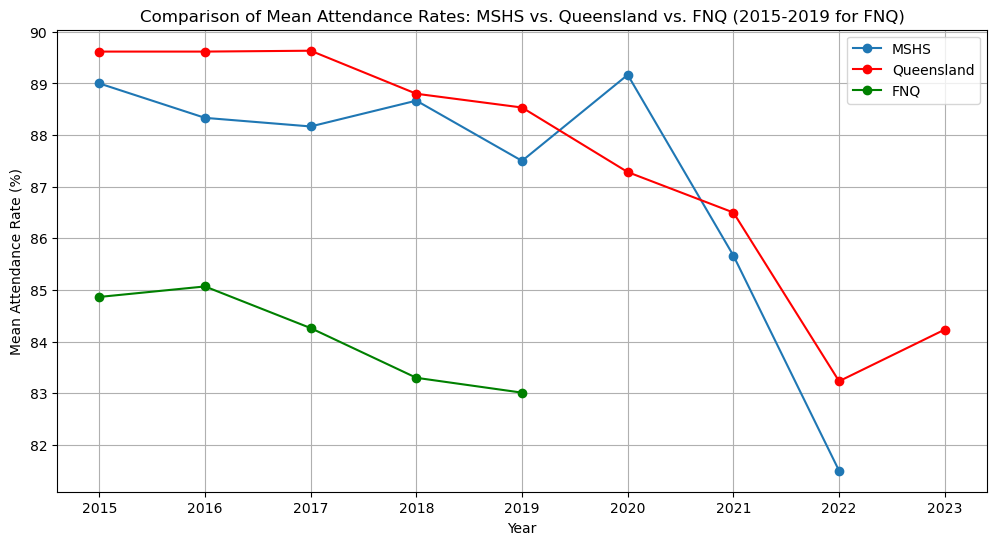

In [43]:
# Load the data for MSHS, FNQ, and Queensland from Excel files
mshs_data_path = 'Data/School/Mossman State High School - Attendance Data by grade level.xlsx'
fnq_data_path = 'Data/School/Far North Queensland State Schools - Attendance Rates and SDA - Aggregated Data for High School.xlsx'
qld_data_path = 'Data/School/Queensland State Schools - Attendance Rates and SDA by Year Level.xlsx'

# Read the data
mshs_data = pd.read_excel(mshs_data_path)
fnq_data = pd.read_excel(fnq_data_path)
qld_data = pd.read_excel(qld_data_path)

# Filter MSHS data for years 2015 onwards and calculate mean attendance rates by year
mshs_filtered = mshs_data[(mshs_data['Year'] >= 2015) & (mshs_data['Year Level'].isin(range(7, 13)))]
mshs_mean_attendance = mshs_filtered.groupby('Year')['Attendance (Percent)'].mean()

# Prepare FNQ data by calculating a simple average of Indigenous and Non-Indigenous attendance rates
fnq_data['Average Attendance'] = fnq_data[['Attendance - Indigenous (Percent)', 'Attendance - Non-Indigenous (Percent)']].mean(axis=1)
fnq_filtered = fnq_data[fnq_data['Year'].between(2015, 2019)]
fnq_mean_attendance = fnq_filtered.groupby('Year')['Average Attendance'].mean()

# Filter Queensland data for year levels 7 to 12 and years 2015 onwards
qld_filtered = qld_data[(qld_data['Year'] >= 2015) & (qld_data['Year Level'].isin(range(7, 13)))]
qld_mean_attendance = qld_filtered.groupby('Year')['Attendance - Overall (Percent)'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(mshs_mean_attendance.index, mshs_mean_attendance, marker='o', linestyle='-', label='MSHS')
plt.plot(qld_mean_attendance.index, qld_mean_attendance, marker='o', linestyle='-', label='Queensland', color='red')
plt.plot(fnq_mean_attendance.index, fnq_mean_attendance, marker='o', linestyle='-', label='FNQ', color='green')
plt.title('Comparison of Mean Attendance Rates: MSHS vs. Queensland vs. FNQ (2015-2019 for FNQ)')
plt.xlabel('Year')
plt.ylabel('Mean Attendance Rate (%)')
plt.legend()
plt.grid(True)
plt.show()